In [1]:
import pandas as pd
import numpy as np

In [4]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

<AxesSubplot:xlabel='rating'>

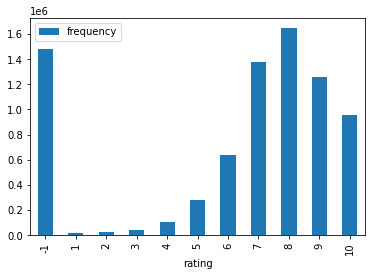

In [20]:
tmp = rating["rating"].value_counts()
index = [-1] + list(range(1, 11))
pd.DataFrame({"frequency": [tmp[i] for i in index], "rating": index}).plot.bar(x="rating", y="frequency")
#a -1 rating means the user viewed it but did not rate it